In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import skdsp.signal.continuous as cs
import skdsp.signal.printer as pt
import numpy as np
import sympy as sp
import scipy.signal as cp
from ipywidgets import interact, fixed
np.seterr(all='ignore')
PI = sp.S.Pi
pi = np.pi

## 1.- Básicas

In [17]:
def s1(sg='delta', fd='nothing', delay=0):
    npts = 15
    ex = []
    ey = []
    if sg == 'delta':
        s = cs.Delta()
        ex = [0, 0, -0.25, 0, 0.25, 0]
        ey = [0, 1,  0.95, 1, 0.95, 1]
    elif sg == 'step':
        s = cs.Step()
        ex = [0, 0]
        ey = [0, 1]
    elif sg == 'ramp':
        s = cs.Ramp()
    elif sg == 'unit ramp':
        s = cs.Ramp() * cs.Step()
    ex = np.array(ex)    
    if fd == 'flip then delay':
        s = s.flip().delay(delay)
        ex = ex + delay
    elif fd == 'delay then flip':
        s = s.delay(delay).flip()
        ex = ex - delay
    elif fd == 'just delay':
        s = s.delay(delay)
        ex = ex + delay
    ns = np.arange(-npts, npts+1, 2**(-3))
    ys = s[ns]
    plt.figure(figsize=(10, 4))
    plt.plot(ns, ys, 'b-', lw=3)
    plt.plot(ex, ey, 'b-', lw=3)
    plt.xlim([-npts, npts])
    plt.ylim([-0.1, 1.1])
    plt.axvline(0, color='k')
    plt.axhline(0, color='k')
    plt.title(pt.latex(s, mode='inline'), size=24)
    plt.grid(True)

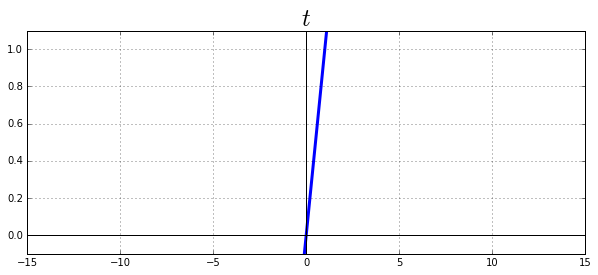

In [18]:
interact(s1, sg=('delta', 'step', 'ramp', 'unit ramp'),
         fd=('just delay', 'flip then delay', 'delay then flip'),
         delay=(-15, 15, 0.25));